<a href="https://colab.research.google.com/github/satrakidol/Machine_Learning_Housing/blob/main/Machine_Learning_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Μέρος 1 (5 μονάδες): Εκτίμηση μέσης τιμής ακινήτου από χαρακτηριστικά απογραφής (δεδομένα πίνακα)

#2.1

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msng
import seaborn as sns
import numpy as np


In [ ]:
# read dataset
df = pd.read_csv("/content/housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


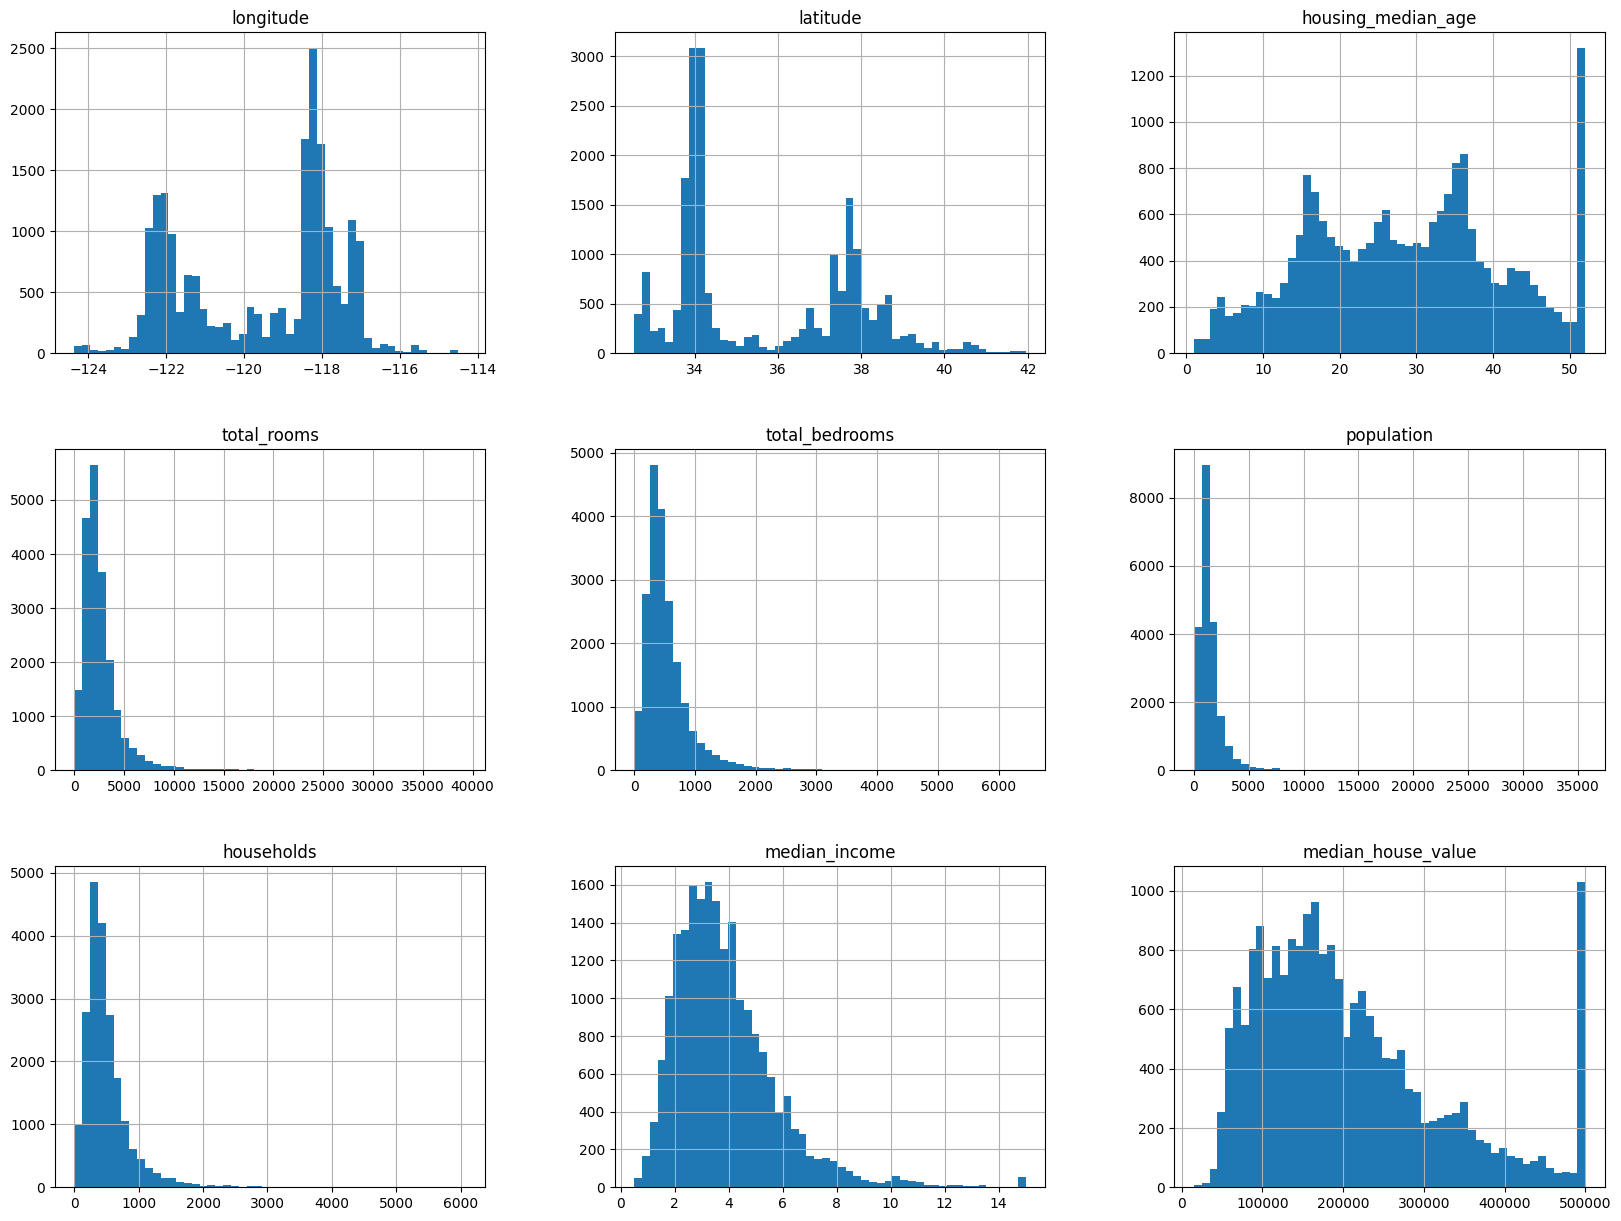

In [ ]:
#creating graphs
df.hist(bins=50,figsize=(20,15))
plt.show()


In [ ]:
#checking for missing values
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

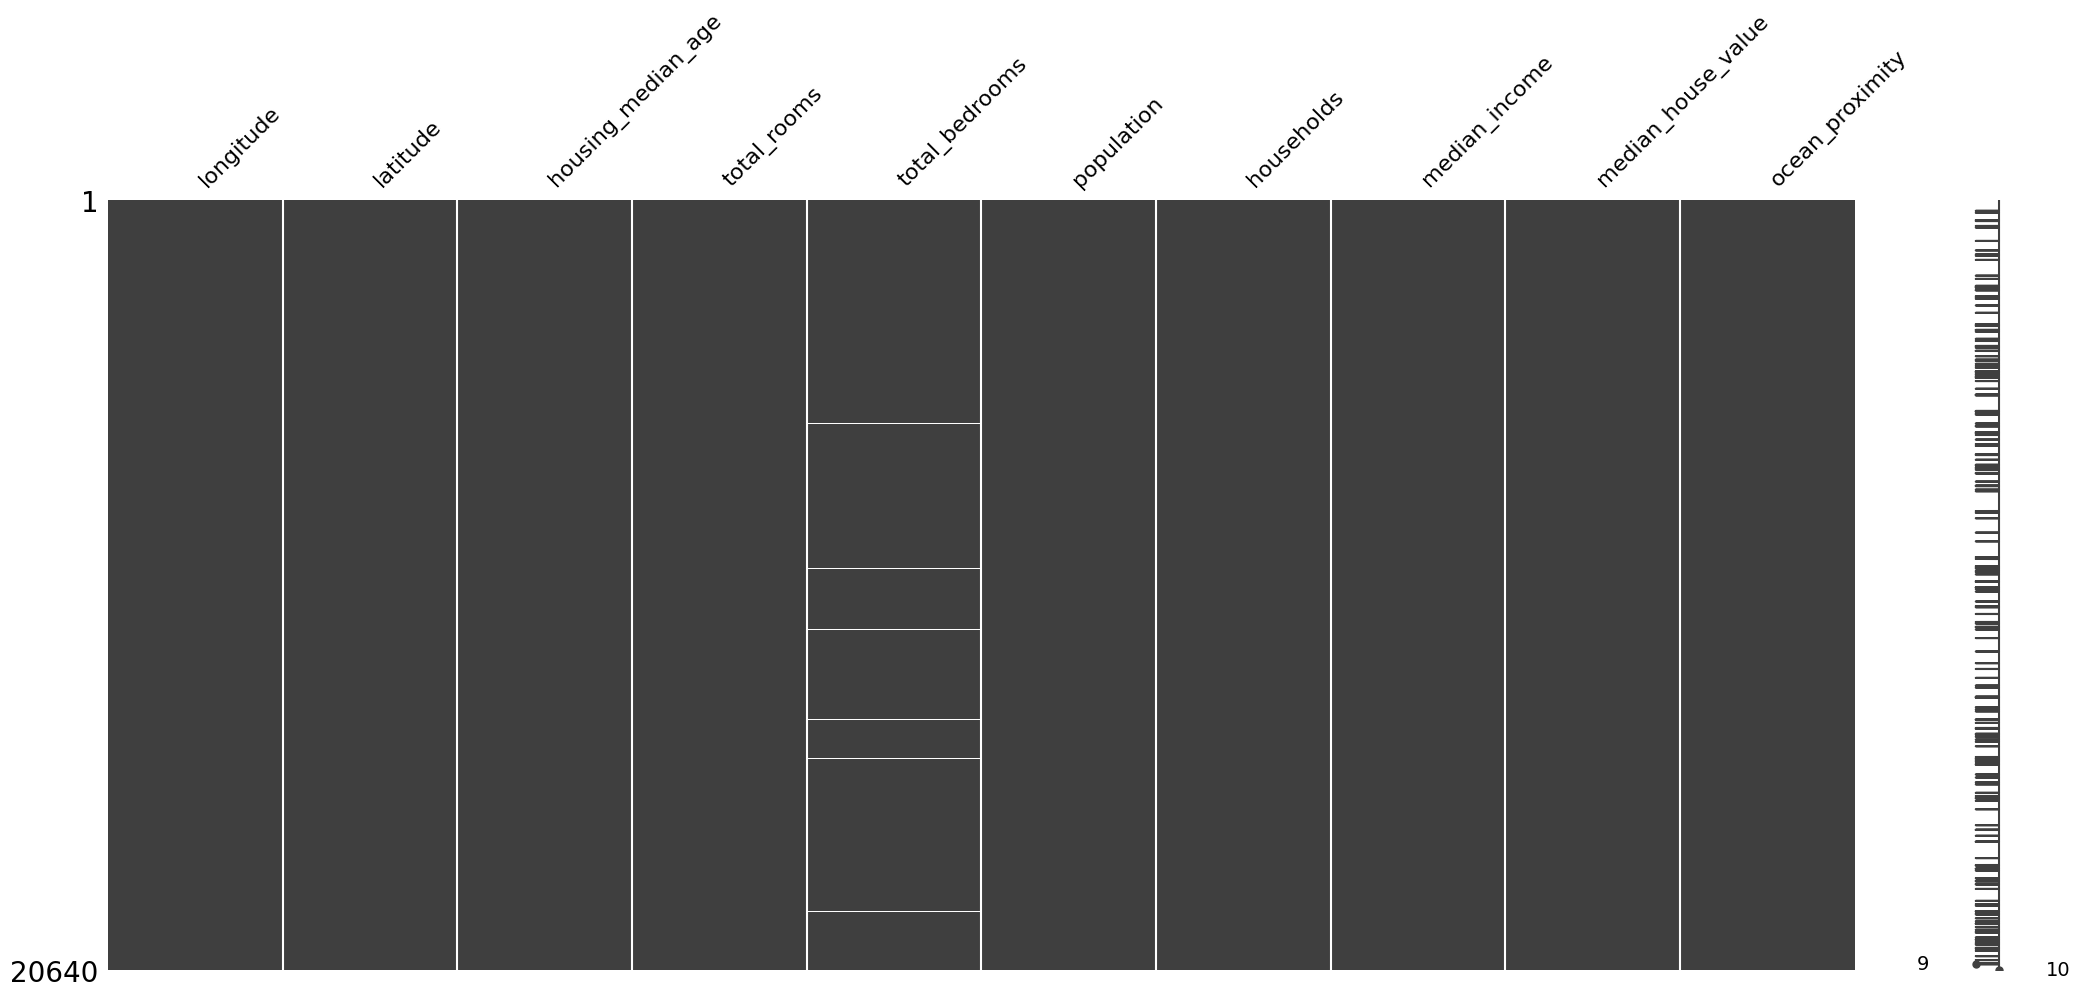

In [ ]:
#confirming missing data visually
msng.matrix(df)

Both checks show that there is missing data at total_bedrooms

fullfiling missing data

In [ ]:
df['total_bedrooms']=df['total_bedrooms'].replace(np.nan, df['total_bedrooms'].median())

cheching again the data

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

finding the options of ocean_proximity

In [ ]:
ocean_proximityOptions = []

In [ ]:
for i in df.ocean_proximity:
  if i not in ocean_proximityOptions:
    ocean_proximityOptions.append(i)

In [ ]:
print(ocean_proximityOptions)

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


In [ ]:
df['NEAR BAY'] = (df['ocean_proximity'] == 'NEAR BAY').astype(int)
df['<1H OCEAN'] = (df['ocean_proximity'] == '<1H OCEAN').astype(int)
df['INLAND'] = (df['ocean_proximity'] == 'INLAND').astype(int)
df['NEAR OCEAN'] = (df['ocean_proximity'] == 'NEAR OCEAN').astype(int)
df['ISLAND'] = (df['ocean_proximity'] == 'ISLAND').astype(int)
df.drop('ocean_proximity', axis=1, inplace=True)

In [ ]:
#checking everything went well
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,0,0,0,0


In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.474489,0.321121,-0.055575,0.045509,0.009446
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.358771,-0.446969,0.351166,-0.160818,-0.016572
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.255172,0.045300,-0.236645,0.021622,0.017020
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.023022,-0.003031,0.025624,-0.009175,-0.007572
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.019667,0.017966,-0.006158,0.000557,-0.004322
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.060880,0.074613,-0.020732,-0.024264,-0.010412
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.010093,0.042435,-0.039402,0.001714,-0.009077
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.056197,0.168876,-0.237496,0.027344,-0.009228
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.160284,0.256617,-0.484859,0.141862,0.023416
NEAR BAY,-0.474489,0.358771,0.255172,-0.023022,-0.019667,-0.060880,-0.010093,0.056197,0.160284,1.000000,-0.314813,-0.240887,-0.135818,-0.005499


<Axes: >

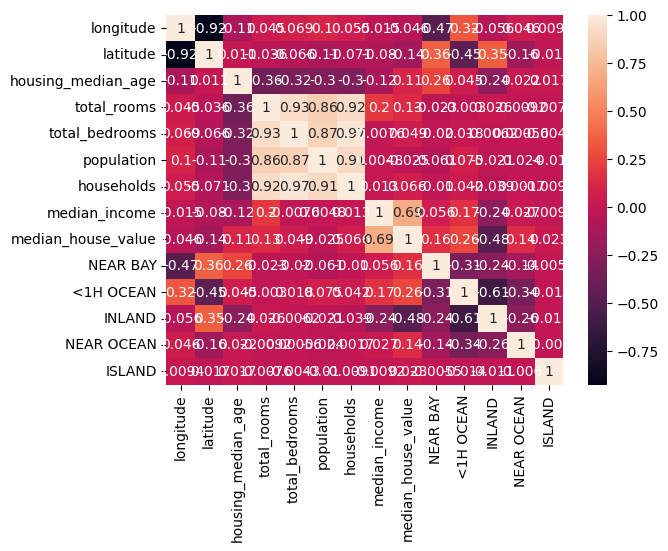

In [ ]:
sns.heatmap(df.corr(), annot=True)

Separating dataframe to dependent (y) and independent (x) variables

In [ ]:
y = df['median_house_value'].values

In [ ]:
x = df

In [ ]:
x.drop('median_house_value', axis=1, inplace=True)

In [ ]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,0,0,0,0


#2.2 - 2.3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_sc = scaler.fit_transform(x_train)
X_test_sc = scaler.transform(x_test)

#2.4

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
y_hat = regressor.predict(X_test_sc)
y_hat_train = regressor.predict(X_train_sc)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_hat)

4733529273.092554

In [ ]:
mean_absolute_error(y_test, y_hat)

50078.09884156545

Παρατηρούμε ότι η απόλυτη τιμή σφάλματος είναι 50078.09884156545, το οποίο μας δείχνει ότι μπορεί να υπάρχει περιθώριο βελτίωσης του μοντέλου μας

In [ ]:
r2_score(y_test, y_hat)

0.6393611711434394

Το οποίο επιβεβαιώνεται και απ' το r2_score

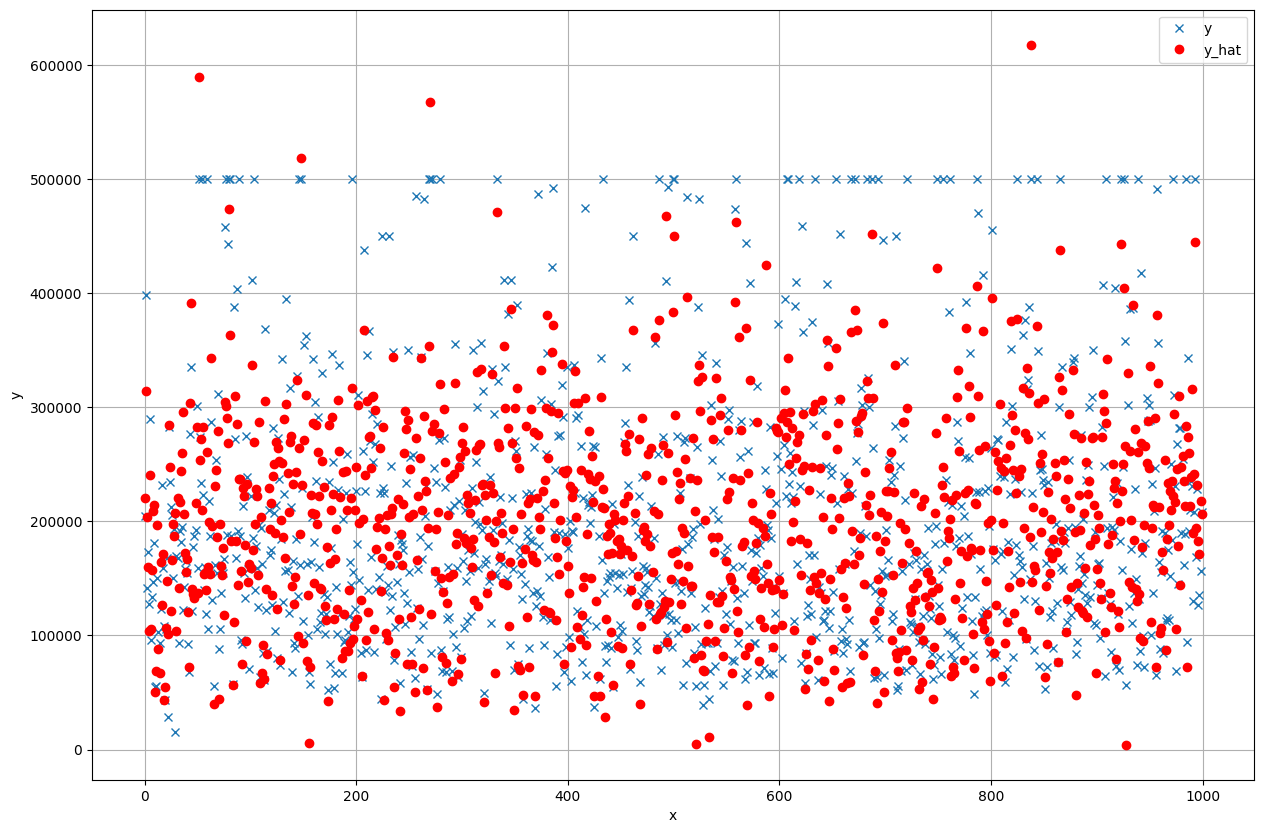

In [ ]:
plt.figure(figsize=(15, 10))
st = 3000
en = 4000
plt.plot(np.arange(en-st), y_test[st:en], 'x')
plt.plot(np.arange(en-st), y_hat[st:en], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y', 'y_hat'])
plt.grid()
plt.show()

In [ ]:
#y_hatWO = regressor.predict(x_test)

#2.5

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RandomForestRegressor_model = RandomForestRegressor(n_estimators= 100, criterion='squared_error', max_depth=10)

In [ ]:
RandomForestRegressor_model=RandomForestRegressor_model.fit(X_train_sc,y_train)

In [ ]:
yhat_RandomForestRegressor_model = RandomForestRegressor_model.predict(X_test_sc)

In [ ]:
print(yhat_RandomForestRegressor_model)

[ 57292.07888409  72716.47143278 459815.89810316 ... 227490.74931101
 139668.12272358 207360.47114005]


In [ ]:
from sklearn import metrics

In [ ]:
mean_squared_error(y_test, yhat_RandomForestRegressor_model)

2846786838.2796206

In [ ]:
mean_absolute_error(y_test, yhat_RandomForestRegressor_model)

36237.83853770741

In [ ]:
r2_score(y_test, yhat_RandomForestRegressor_model)

0.7831085830191381

Παρατηρούμε οτι με την χρήση του Random Forest όλες οι μετρικές βελτιώθηκαν. Αυτό οφείλεται στον χωρισμό του dataset σε υποσύνολα βαση των χαρακτηριστικών τους και στην έλλειψη γραμικότητας του dataset